In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm


In [2]:
def compute_return(y, r_type="log", h=1):
    
    # exclude first h observations, h for horizon, n is the size of observations used
    # e.g. compute five-step cumulative returns for the first data in S_T need the T_0-(n+4) observation 
    y2 = y[h:]
    # exclude last h observations
    y1 = y[:-h]
    
    if r_type == "log":
        ret = np.concatenate(([np.nan]*h, 100 * (np.log(y2) - np.log(y1))))
    else:
        ret = np.concatenate(([np.nan]*h, 100 * (y2-y1)/y1))
        
    return ret

In [3]:
import yfinance as yf

msft = yf.Ticker("^GDAXI")

hist = msft.history(start = '2022-12-30',end = '2023-11-16')

In [4]:
data_close_price = hist.drop(columns=["Open","High","Low","Volume","Dividends","Stock Splits"])


In [5]:
data_close_price

,Close
Date,
2022-12-30 00:00:00+01:00,13923.589844
2023-01-02 00:00:00+01:00,14069.259766
2023-01-03 00:00:00+01:00,14181.669922
2023-01-04 00:00:00+01:00,14490.780273
2023-01-05 00:00:00+01:00,14436.309570
...,...
2023-11-09 00:00:00+01:00,15352.540039
2023-11-10 00:00:00+01:00,15234.389648
2023-11-13 00:00:00+01:00,15345.000000


In [6]:
for i in range(5):
   data_close_price ["ret"+str(i+1)] = compute_return(data_close_price["Close"].values, h=i+1)

In [7]:
data_close_price

,Close,ret1,ret2,ret3,ret4,ret5
Date,,,,,,
2022-12-30 00:00:00+01:00,13923.589844,NaN,NaN,NaN,NaN,NaN
2023-01-02 00:00:00+01:00,14069.259766,1.040775,NaN,NaN,NaN,NaN
2023-01-03 00:00:00+01:00,14181.669922,0.795802,1.836577,NaN,NaN,NaN
2023-01-04 00:00:00+01:00,14490.780273,2.156232,2.952035,3.992809,NaN,NaN
2023-01-05 00:00:00+01:00,14436.309570,-0.376607,1.779625,2.575427,3.616202,NaN
...,...,...,...,...,...,...
2023-11-09 00:00:00+01:00,15352.540039,0.804006,1.310618,1.420692,1.069299,1.370296
2023-11-10 00:00:00+01:00,15234.389648,-0.772559,0.031447,0.538060,0.648134,0.296741
2023-11-13 00:00:00+01:00,15345.000000,0.723434,-0.049125,0.754881,1.261494,1.371568


In [8]:
data_cumre = data_close_price.drop(columns=["Close"])

<Axes: xlabel='Date'>

<Figure size 10000x10000 with 0 Axes>

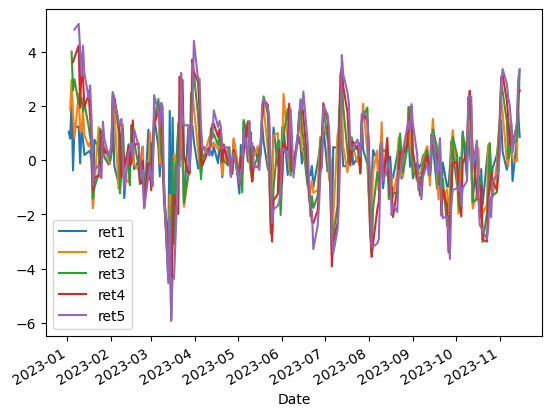

In [9]:
plt.figure(figsize=(100,100))
data_cumre.plot()

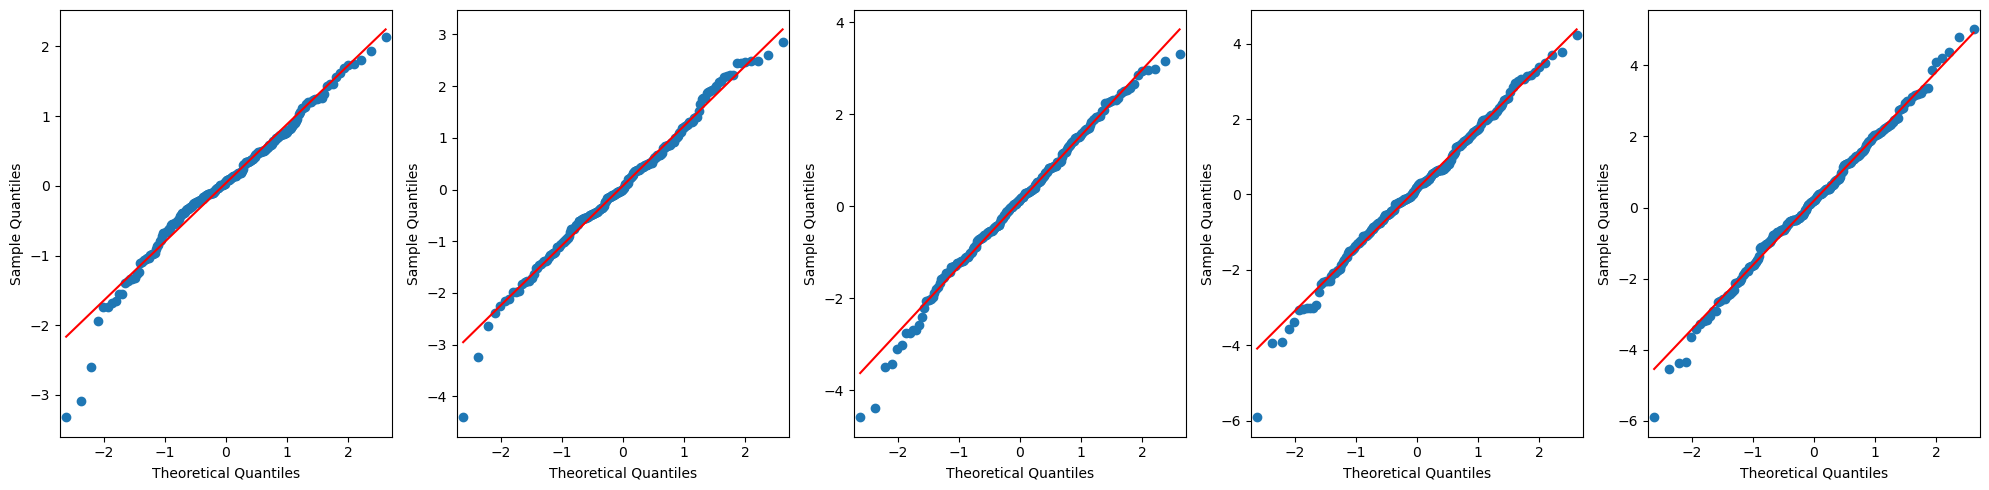

In [28]:
import statsmodels.api as sm
fig, axs = plt.subplots(1, 5, figsize=(20, 5)) 

sm.qqplot(data_cumre["ret1"], line='s', ax=axs[0])
sm.qqplot(data_cumre["ret2"], line='s', ax=axs[1])
sm.qqplot(data_cumre["ret3"], line='s', ax=axs[2])
sm.qqplot(data_cumre["ret4"], line='s', ax=axs[3])
sm.qqplot(data_cumre["ret5"], line='s', ax=axs[4])


plt.tight_layout() 

In [29]:
print(data_cumre["ret1"].quantile([.025, .25, .5, .75, .975]))

0.025   -1.705915
0.250   -0.372037
0.500    0.066105
0.750    0.541017
0.975    1.655224
Name: ret1, dtype: float64


In [30]:
summary_ret1 = data_cumre["ret1"].describe()
print(summary_ret1)


count    221.000000
mean       0.039356
std        0.845674
min       -3.320973
25%       -0.372037
50%        0.066105
75%        0.541017
max        2.140524
Name: ret1, dtype: float64


In [31]:
pred_empirical = np.empty((5,5))


In [32]:
for i in range(5):
    ret_str = "ret"+str(i+1)
    
    pred_empirical[i,:] = data_cumre[ret_str].quantile([.025, .25, .5, .75, .975])

In [33]:
pred_empirical

array([[-1.70591517, -0.37203696,  0.0661055 ,  0.54101673,  1.65522352],
       [-2.13951546, -0.57848002,  0.00979458,  0.79874751,  2.44076285],
       [-2.89263852, -0.71691491,  0.16317482,  0.98491047,  2.75711332],
       [-3.04424723, -0.81859296,  0.18547848,  1.27237576,  3.21038323],
       [-3.35462537, -0.78419071,  0.20393333,  1.4141105 ,  3.61410683]])

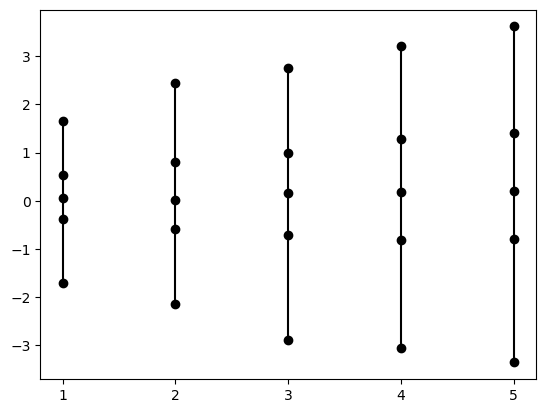

In [34]:
x = np.arange(5)+1
_ = plt.plot(x,pred_empirical, ls="", marker="o", c="black")
_ = plt.xticks(x, x)
_ = plt.plot((x,x),(pred_empirical[:,0], pred_empirical[:,-1]),c='black')

In [35]:
#Check normality 

from scipy.stats import jarque_bera

# store the Jarque-Bera test results in a table
jb_results = pd.DataFrame(columns=['Jarque-Bera Statistic', 'p-value'])

# Perform Jarque-Bera test for each column
for column in data_cumre.columns:
    jb_statistic, p_value = jarque_bera(data_cumre[column])
    jb_results.loc[column] = [jb_statistic, p_value]

print("Jarque-Bera Test Results for Normality:")
print(jb_results)

Jarque-Bera Test Results for Normality:
      Jarque-Bera Statistic       p-value
ret1              33.012041  6.784633e-08
ret2               4.244473  1.197635e-01
ret3               4.565567  1.019999e-01
ret4               4.156024  1.251788e-01
ret5               1.954189  3.764032e-01


In [36]:
#Check ACF, PACF for each ret

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [38]:
data_cumre = data_cumre.dropna()

In [39]:
data_cumre

,ret1,ret2,ret3,ret4,ret5
Date,,,,,
2023-01-06 00:00:00+01:00,1.196103,0.819496,2.975728,3.771530,4.812305
2023-01-09 00:00:00+01:00,1.243505,2.439608,2.063001,4.219233,5.015035
2023-01-10 00:00:00+01:00,-0.123315,1.120190,2.316293,1.939686,4.095918
2023-01-11 00:00:00+01:00,1.166204,1.042889,2.286394,3.482497,3.105890
2023-01-12 00:00:00+01:00,0.735782,1.901986,1.778671,3.022176,4.218279
...,...,...,...,...,...
2023-11-09 00:00:00+01:00,0.804006,1.310618,1.420692,1.069299,1.370296
2023-11-10 00:00:00+01:00,-0.772559,0.031447,0.538060,0.648134,0.296741
2023-11-13 00:00:00+01:00,0.723434,-0.049125,0.754881,1.261494,1.371568


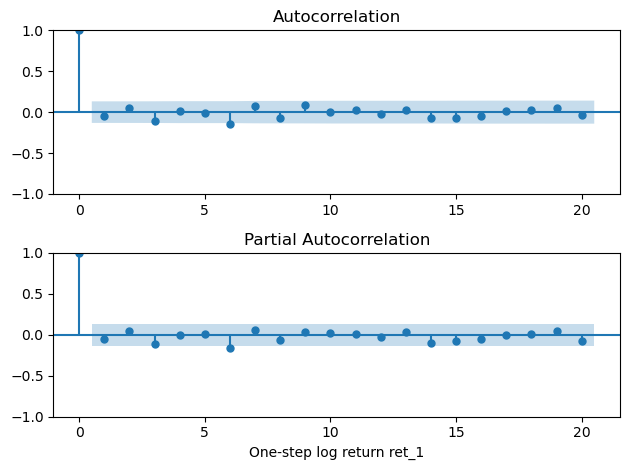

In [41]:
f, ax = plt.subplots(nrows=2, ncols=1,)
plot_acf(data_cumre["ret1"],lags=20, ax=ax[0])
plot_pacf(data_cumre["ret1"],lags=20, ax=ax[1], method='ols')
plt.xlabel('One-step log return ret_1')
plt.tight_layout()

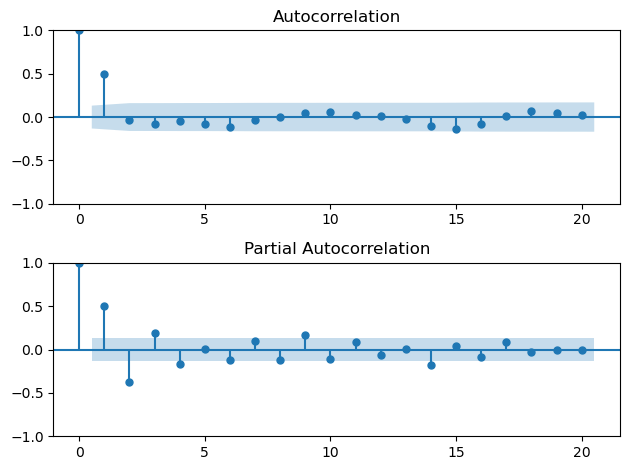

In [23]:
f, ax = plt.subplots(nrows=2, ncols=1,)
plot_acf(data_cumre["ret2"],lags=20, ax=ax[0])
plot_pacf(data_cumre["ret2"],lags=20, ax=ax[1], method='ols')
plt.tight_layout()


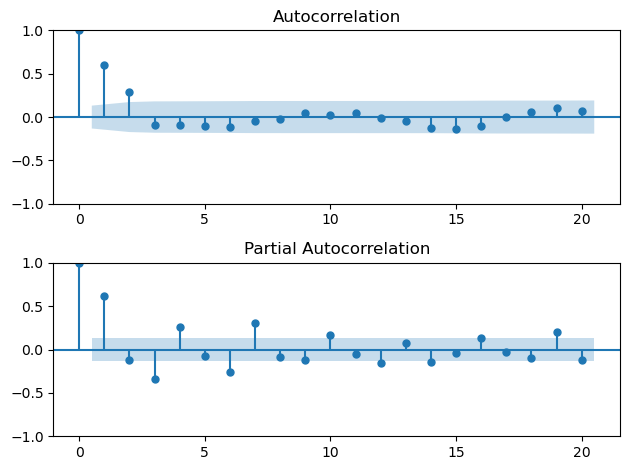

In [24]:
f, ax = plt.subplots(nrows=2, ncols=1,)
plot_acf(data_cumre["ret3"],lags=20, ax=ax[0])
plot_pacf(data_cumre["ret3"],lags=20, ax=ax[1], method='ols')
plt.tight_layout()

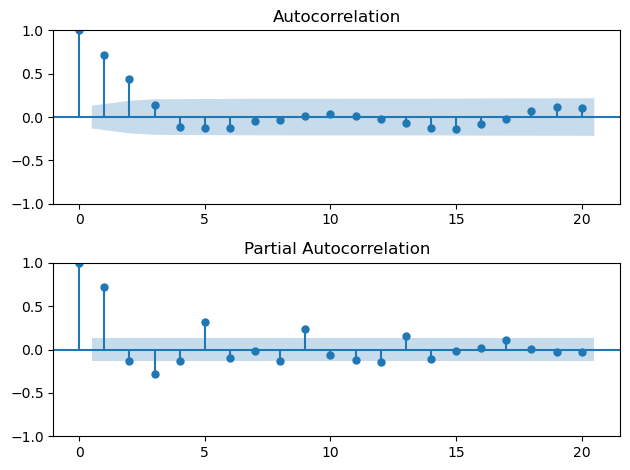

In [25]:
f, ax = plt.subplots(nrows=2, ncols=1,)
plot_acf(data_cumre["ret4"],lags=20, ax=ax[0])
plot_pacf(data_cumre["ret4"],lags=20, ax=ax[1], method='ols')
plt.tight_layout()

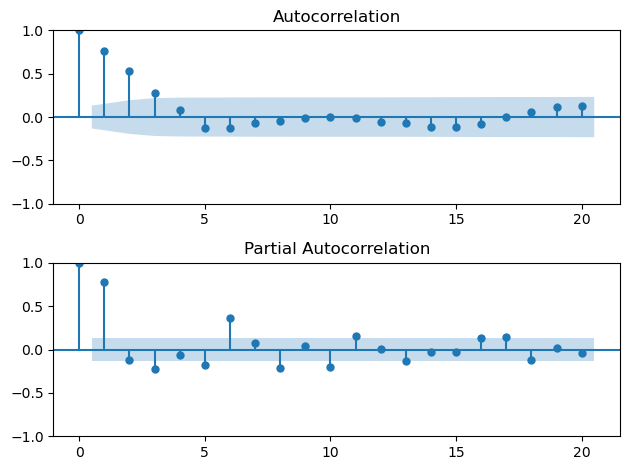

In [26]:
f, ax = plt.subplots(nrows=2, ncols=1,)
plot_acf(data_cumre["ret5"],lags=20, ax=ax[0])
plot_pacf(data_cumre["ret5"],lags=20, ax=ax[1], method='ols')
plt.tight_layout()

In [27]:
from statsmodels.tsa.ar_model import AutoReg
ret3 = np.array(data_cumre["ret3"])
model_ret3 = AutoReg(ret1, lags = 5, old_names = False).fit()

NameError: name 'ret1' is not defined

In [ ]:
model_ret3.aic

In [ ]:
#check stationary
from statsmodels.tsa.stattools import adfuller


In [ ]:
results_df = pd.DataFrame(columns=['ADF Statistic', 'p-value', 'Critical Value (5%)'])

# Perform ADF test for each ret
for column in data_cumre.columns:
    result = adfuller(data_cumre[column])
    adf_statistic, p_value, critical_values = result[0], result[1], result[4]
    results_df.loc[column] = [adf_statistic, p_value, critical_values['5%']]

# Plot the results
plt.figure(figsize=(10, 6))
plt.title('ADF Test Results at 5% Significance Level')
plt.table(cellText=results_df.values,
          colLabels=results_df.columns,
          rowLabels=results_df.index,
          loc='center')
plt.axis('off')
plt.show()

In [ ]:
PATH = "/Users/tweedywu/Desktop/FC"
data_cumre.to_csv(PATH+"/"+"Trainingset.csv",index=False)